# Amazon Reviews Sentiment Analysis

**Goal**

Analyze the sentiments from the given dataset of Amazon

**Dataset**

The dataset is collected from the following link https://www.kaggle.com/datasets/tarkkaanko/amazon

**Description**

One of the most important problems in e-commerce is the correct calculation of the points given to after-sales products. The solution to this problem is to provide greater customer satisfaction for the e-commerce site, product prominence for sellers, and a seamless shopping experience for buyers. Another problem is the correct ordering of the comments given to the products. The prominence of misleading comments will cause both financial losses and customer losses. In solving these 2 basic problems, e-commerce site and sellers will increase their sales, while customers will complete their purchasing journey without any problems.

This dataset consists of ranking product ratings and reviews on Amazon.

A practice project from https://github.com/World-of-ML/DL-Simplified



## Preprocess data

In [2]:
import pandas as pd
# Get the data
data_dir = './amazon_reviews.csv'
amazon_dt = pd.read_csv(data_dir)
amazon_dt.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [3]:
amazon_dt['reviewText'].head()

0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: reviewText, dtype: object

In [4]:
# Visualize one of the review
amazon_dt['reviewText'][1]

'Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.'

In [5]:
# Check our datas and see if there's missing value
amazon_dt.isna().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [6]:
# drop the missing value
amazon_dt = amazon_dt.dropna()

In [7]:
amazon_dt.isna().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [8]:
amazon_reviews = amazon_dt.copy()
amazon_reviews = pd.DataFrame(amazon_reviews.drop(['reviewerName', 
                                                   'reviewTime', 
                                                   'day_diff', 
                                                   'day_diff', 
                                                   'helpful_yes',
                                                   'helpful_no',
                                                   'total_vote',
                                                   'score_pos_neg_diff',
                                                   'score_average_rating',
                                                   'wilson_lower_bound',
                                                   'Unnamed: 0'], axis=1))
amazon_reviews.head()

,overall,reviewText
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."
5,5.0,It's mini storage. It doesn't do anything els...


In [9]:
# Shuffle amazon_reviews 
amazon_reviews_shuffled = amazon_reviews.sample(frac=1, random_state=512)
amazon_reviews_shuffled.head()

,overall,reviewText
906,4.0,Love this 32gb micro sd card. I put it in my S...
2984,5.0,I purchased the Samsung Galaxy S3 because I co...
3705,4.0,Well works just like any other SD card I don;t...
4809,5.0,I ordered this to replace an aging Class 4 car...
863,4.0,...to have both the micro and the adapter in t...


Apply labels to overall

2 = Postive;
1 = Neutral;
0 = Negative;

In [10]:
reviews_dict = {
    5.0: '2',
    4.0: '2',
    3.0: '1',
    2.0: '0',
    1.0: '0'
}

amazon_reviews_shuffled['overall'] = amazon_reviews_shuffled['overall'].replace(reviews_dict).astype(int)
amazon_reviews_shuffled.head()

,overall,reviewText
906,2,Love this 32gb micro sd card. I put it in my S...
2984,2,I purchased the Samsung Galaxy S3 because I co...
3705,2,Well works just like any other SD card I don;t...
4809,2,I ordered this to replace an aging Class 4 car...
863,2,...to have both the micro and the adapter in t...


In [11]:
amazon_reviews_shuffled['overall'].value_counts()

2    4447
0     324
1     142
Name: overall, dtype: int64

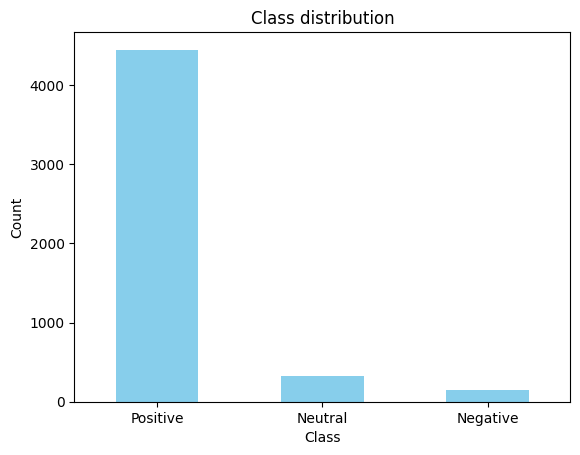

In [12]:
import matplotlib.pyplot as plt

amazon_reviews_shuffled['overall'].value_counts().plot(kind='bar', color = "skyblue")
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class distribution')
plt.xticks([0, 1, 2], ['Positive', 'Neutral', 'Negative'], rotation=0)
plt.show()

In [13]:
# Visualize some random examples 
import random 
random_index = random.randint(0, len(amazon_reviews_shuffled)-5) # Create random indexes not higher than samples 
for row in amazon_reviews_shuffled[['overall', 'reviewText']][random_index:random_index+5].itertuples():
    _, target, text = row 
    # print(row)
    print(f'Target:{target}', '(Postive)' if target>1 else '(Neutral)' if target>0 else'(Negative)')
    print(f'Test:\n{text}\n')
    print('---\n')

Target:2 (Postive)
Test:
got this because i had a 2 GB one that filled up. i kept getting the insufficient disk space on my phone. my kids take my phone and do selfies. mostly my daughter. I had to get a bigger card. the 2GB one was a carry over from an old phone.needless to say this was sweet. plenty of space. and i dont have to delete pictures anymore. well for now at least.my daughter loves selfies.

---

Target:2 (Postive)
Test:
We were going on vacation and I wanted to take a bunch of digital media for the long plane flights and for chilling during downtime. This chip took everything I needed and worked without issue. Glad to see the 128GB chips on the market, looking forward to the 256GB ones!

---

Target:2 (Postive)
Test:
As I just mentioned, it is both fast and efficient.  After several months of use in both my laptop and 7 inch Galaxy Tab 2, it has displayed exceptional speed and no loss of data.  I highly recommend this card for use in computing devices and/or tablets.

---


## Split the data into train and validation set 

In [14]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets 
train_sentences, val_sentences, train_labels, val_labels = train_test_split(amazon_reviews_shuffled['reviewText'].to_numpy(),
                                                                            amazon_reviews_shuffled['overall'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=512)

In [15]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(4421, 4421, 492, 492)

In [16]:
# Check the first 5 samples 
train_sentences[:5], train_labels[:5]

(array(['I only buy SanDisk and this item like all the others I have purchased, worked perfectly the first time.  Love it!',
        'Works great in my Samsung Galaxy Note 2.Put the memory cards in and go to storage in the settings.  Click format card and off you go.I have not measured read or write speed but i can tell you i can copy over 1Gb video file in just a few seconds.',
        'I liked this so much that I bought a 2nd here.  The first I put in my Samsung Galaxy Player 5 and the second in my Samsung Galaxy S 4G phone.  The card easily hold all my mp3s and apps.  This card is noticeably faster than the cheaper cards that have a speed of 4 on them...this card is a 10 and when you first boot your device you see all your apps get loaded within seconds.  If you want a good 32 GB mini SD card then this is the one!',
        "I'm not sure what else to say other than, &#34;it works&#34;.  I use this card with my Sandisk Wireless Flash.....I think I'll buy a couple more.",
        'Thi

## Converting text into numbers

### Text Vectorization

In [17]:
# Find the average number of tokens (words) in the training tweets 
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

51

In [18]:
# Set up text vectorization variables 
max_vocab_length = 10000 
max_length = 51 

In [19]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                   output_mode='int',
                                   output_sequence_length=max_length)

In [20]:
# Fit the text vectorizer to the training text 
text_vectorizer.adapt(train_sentences)

In [21]:
# Choose a random sentence from training dataset and tokenize it 
random_sentence  = random.choice(train_sentences)
print(f'Original test: \n{random_sentence}\n\nVectorized version:')
text_vectorizer([random_sentence])

Original test: 
i know what my title says, and it's the actual amount on the card, which is really good. other cards that i own have a greater difference per advertised amount. i use it for my lenovo lynx tablet and it works perfectly.

Vectorized version:


<tf.Tensor: shape=(1, 51), dtype=int64, numpy=
array([[   3,  200,   66,    8, 1740,  379,    4,   35,    2,  824,  426,
          16,    2,    9,  119,   15,  136,   43,   88,   39,   18,    3,
         520,   17,    7, 1975,  408,  621,  307,  426,    3,   32,    5,
          11,    8, 1178, 7103,   65,    4,    5,   21,  158,    0,    0,
           0,    0,    0,    0,    0,    0,    0]])>

### Embedding layer

In [22]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                            output_dim = 128,
                            input_length = max_length)

In [23]:
# Check how embedding works
print(f'Original text:\n {random_sentence} \n\nEmbedded sentence:')

# Embed the random sentence 
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 i know what my title says, and it's the actual amount on the card, which is really good. other cards that i own have a greater difference per advertised amount. i use it for my lenovo lynx tablet and it works perfectly. 

Embedded sentence:


<tf.Tensor: shape=(1, 51, 128), dtype=float32, numpy=
array([[[ 0.00478355,  0.0173541 ,  0.04299534, ..., -0.03953049,
         -0.03309982,  0.04228473],
        [ 0.0348183 ,  0.02635379,  0.01500653, ..., -0.03364153,
          0.01138719,  0.04847551],
        [ 0.00849624,  0.0451155 ,  0.0042231 , ..., -0.04251258,
          0.00433178,  0.00286491],
        ...,
        [-0.03098078, -0.00949993,  0.03512906, ...,  0.02112541,
          0.03679874,  0.03236523],
        [-0.03098078, -0.00949993,  0.03512906, ...,  0.02112541,
          0.03679874,  0.03236523],
        [-0.03098078, -0.00949993,  0.03512906, ...,  0.02112541,
          0.03679874,  0.03236523]]], dtype=float32)>

## Model Experiment

### Model 1. Naive Bayes (baseline)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
# Evaluate our baseline model 
baseline_score = model_0.score(val_sentences,val_labels)
baseline_score

0.9105691056910569

In [26]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20] == val_labels[:20]

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False])

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  # Calculate model accuracy 
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate precision, recall and f1 score 
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')  
  model_results = {'accuracy':model_accuracy,
            'precision': model_precision,
            'recall': model_recall,
            'f1': model_f1}
  return model_results

# Get baseline results 
baseline_results = calculate_results(y_true=val_labels,
                    y_pred=baseline_preds)
baseline_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 91.05691056910568,
 'precision': 0.8291360962390112,
 'recall': 0.9105691056910569,
 'f1': 0.8679467220204117}

### Model 2: Simple deep learning model

In [28]:
# One hot encoded labels
from tensorflow.keras.utils import to_categorical

train_labels_onehot = to_categorical(train_labels)
val_labels_onehot = to_categorical(val_labels)

In [29]:
train_labels_onehot.shape, val_labels_onehot.shape

((4421, 3), (492, 3))

In [30]:
import tensorflow as tf

inputs = layers.Input(shape=(1,), dtype=tf.string) 
x = text_vectorizer(inputs) 
x = embedding(x) 
x = layers.GlobalAveragePooling1D()(x) 
outputs = layers.Dense(3, activation='softmax')(x) 
model_2 = tf.keras.Model(inputs, outputs, name='model_2_simple')

model_2.compile(loss='categorical_crossentropy',
        optimizer = tf.keras.optimizers.Adam(),
        metrics=['accuracy'])

In [31]:
model_2_history = model_2.fit(train_sentences,
                            train_labels_onehot,
                            epochs=10,
                            validation_data=(val_sentences, val_labels_onehot),
                            )

Epoch 1/10
139/139 [==============================] - 27s 159ms/step - loss: 0.5562 - accuracy: 0.9000 - val_loss: 0.3237 - val_accuracy: 0.9106
Epoch 2/10
139/139 [==============================] - 9s 67ms/step - loss: 0.3148 - accuracy: 0.9045 - val_loss: 0.2963 - val_accuracy: 0.9106
Epoch 3/10
139/139 [==============================] - 3s 25ms/step - loss: 0.2816 - accuracy: 0.9048 - val_loss: 0.2737 - val_accuracy: 0.9106
Epoch 4/10
139/139 [==============================] - 3s 22ms/step - loss: 0.2507 - accuracy: 0.9111 - val_loss: 0.2518 - val_accuracy: 0.9167
Epoch 5/10
139/139 [==============================] - 1s 7ms/step - loss: 0.2203 - accuracy: 0.9249 - val_loss: 0.2292 - val_accuracy: 0.9207
Epoch 6/10
139/139 [==============================] - 1s 10ms/step - loss: 0.1927 - accuracy: 0.9346 - val_loss: 0.2144 - val_accuracy: 0.9329
Epoch 7/10
139/139 [==============================] - 2s 17ms/step - loss: 0.1705 - accuracy: 0.9410 - val_loss: 0.2064 - val_accuracy: 0.932

In [32]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_results = calculate_results(val_labels_onehot, model_2_preds)
model_2_results

16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 92.07317073170732,
 'precision': 0.9198455108195334,
 'recall': 0.9207317073170732,
 'f1': 0.9160428237945747}

### Model 3: GRU

In [33]:
inputs=layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

model_3.compile(loss='categorical_crossentropy',
        optimizer = tf.keras.optimizers.Adam(),
        metrics=['accuracy'])

model_3_history = model_3.fit(train_sentences,
                            train_labels_onehot,
                            epochs=10,
                            validation_data=(val_sentences, val_labels_onehot),
                            )

Epoch 1/10
139/139 [==============================] - 21s 126ms/step - loss: 0.2880 - accuracy: 0.9224 - val_loss: 0.2155 - val_accuracy: 0.9329
Epoch 2/10
139/139 [==============================] - 5s 39ms/step - loss: 0.1167 - accuracy: 0.9602 - val_loss: 0.2274 - val_accuracy: 0.9309
Epoch 3/10
139/139 [==============================] - 4s 27ms/step - loss: 0.0859 - accuracy: 0.9686 - val_loss: 0.2590 - val_accuracy: 0.9248
Epoch 4/10
139/139 [==============================] - 3s 20ms/step - loss: 0.0599 - accuracy: 0.9819 - val_loss: 0.2853 - val_accuracy: 0.9268
Epoch 5/10
139/139 [==============================] - 2s 14ms/step - loss: 0.0348 - accuracy: 0.9905 - val_loss: 0.3665 - val_accuracy: 0.9045
Epoch 6/10
139/139 [==============================] - 2s 13ms/step - loss: 0.0207 - accuracy: 0.9955 - val_loss: 0.4295 - val_accuracy: 0.9207
Epoch 7/10
139/139 [==============================] - 2s 11ms/step - loss: 0.0163 - accuracy: 0.9959 - val_loss: 0.3898 - val_accuracy: 0.92

In [34]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_results = calculate_results(val_labels_onehot, model_3_preds)
model_3_results

16/16 [==============================] - 0s 3ms/step


{'accuracy': 91.869918699187,
 'precision': 0.9149595062536409,
 'recall': 0.9186991869918699,
 'f1': 0.9167021054825933}

### Model 4: Bidirectional LSTM

In [35]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4_bidirectional')

model_4.compile(loss='categorical_crossentropy',
        optimizer = tf.keras.optimizers.Adam(),
        metrics=['accuracy'])

model_4_history = model_4.fit(train_sentences,
                            train_labels_onehot,
                            epochs=10,
                            validation_data=(val_sentences, val_labels_onehot),
                            )

Epoch 1/10
139/139 [==============================] - 18s 100ms/step - loss: 0.1490 - accuracy: 0.9550 - val_loss: 0.2545 - val_accuracy: 0.9289
Epoch 2/10
139/139 [==============================] - 7s 53ms/step - loss: 0.0378 - accuracy: 0.9887 - val_loss: 0.3570 - val_accuracy: 0.9167
Epoch 3/10
139/139 [==============================] - 4s 29ms/step - loss: 0.0132 - accuracy: 0.9971 - val_loss: 0.4731 - val_accuracy: 0.9146
Epoch 4/10
139/139 [==============================] - 2s 16ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.5321 - val_accuracy: 0.9187
Epoch 5/10
139/139 [==============================] - 3s 19ms/step - loss: 0.0215 - accuracy: 0.9923 - val_loss: 0.3753 - val_accuracy: 0.9207
Epoch 6/10
139/139 [==============================] - 3s 20ms/step - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.5296 - val_accuracy: 0.9045
Epoch 7/10
139/139 [==============================] - 2s 12ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.5065 - val_accuracy: 0.91

In [36]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_results = calculate_results(val_labels_onehot, model_4_preds)
model_4_results

16/16 [==============================] - 1s 4ms/step


{'accuracy': 91.26016260162602,
 'precision': 0.9118682835099139,
 'recall': 0.9126016260162602,
 'f1': 0.9116940719087873}

### Model 5 Conv 1D

In [37]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, 
          kernel_size=5,
          activation='relu',
          padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_Conv1D')

model_5.compile(loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'])

model_5_history = model_5.fit(train_sentences,
                            train_labels_onehot,
                            epochs=10,
                            validation_data=(val_sentences, val_labels_onehot),
                            )

Epoch 1/10
139/139 [==============================] - 20s 97ms/step - loss: 0.1362 - accuracy: 0.9518 - val_loss: 0.2543 - val_accuracy: 0.9289
Epoch 2/10
139/139 [==============================] - 7s 47ms/step - loss: 0.0463 - accuracy: 0.9871 - val_loss: 0.2771 - val_accuracy: 0.9228
Epoch 3/10
139/139 [==============================] - 2s 15ms/step - loss: 0.0201 - accuracy: 0.9966 - val_loss: 0.3142 - val_accuracy: 0.9207
Epoch 4/10
139/139 [==============================] - 1s 11ms/step - loss: 0.0099 - accuracy: 0.9986 - val_loss: 0.3320 - val_accuracy: 0.9248
Epoch 5/10
139/139 [==============================] - 1s 8ms/step - loss: 0.0044 - accuracy: 0.9998 - val_loss: 0.3615 - val_accuracy: 0.9289
Epoch 6/10
139/139 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3797 - val_accuracy: 0.9289
Epoch 7/10
139/139 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3962 - val_accuracy: 0.9289


In [38]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_results = calculate_results(val_labels_onehot, model_5_preds)
model_5_results

16/16 [==============================] - 0s 4ms/step


{'accuracy': 92.88617886178862,
 'precision': 0.9148885812002224,
 'recall': 0.9288617886178862,
 'f1': 0.9215987813851648}

### Model 6: USE (Universal Sentence Encoder)

In [39]:
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')

In [40]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax') 
], name='model_6_USE')

model_6.compile(loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'])

model_6_history = model_6.fit(train_sentences,
                            train_labels_onehot,
                            epochs=10,
                            validation_data=(val_sentences, val_labels_onehot),
                            )

Epoch 1/10
139/139 [==============================] - 8s 30ms/step - loss: 0.4333 - accuracy: 0.8946 - val_loss: 0.2621 - val_accuracy: 0.9126
Epoch 2/10
139/139 [==============================] - 3s 19ms/step - loss: 0.2481 - accuracy: 0.9204 - val_loss: 0.2212 - val_accuracy: 0.9248
Epoch 3/10
139/139 [==============================] - 3s 18ms/step - loss: 0.2179 - accuracy: 0.9310 - val_loss: 0.2091 - val_accuracy: 0.9268
Epoch 4/10
139/139 [==============================] - 3s 18ms/step - loss: 0.2031 - accuracy: 0.9358 - val_loss: 0.2097 - val_accuracy: 0.9228
Epoch 5/10
139/139 [==============================] - 5s 34ms/step - loss: 0.1929 - accuracy: 0.9385 - val_loss: 0.2068 - val_accuracy: 0.9228
Epoch 6/10
139/139 [==============================] - 3s 18ms/step - loss: 0.1846 - accuracy: 0.9412 - val_loss: 0.2042 - val_accuracy: 0.9289
Epoch 7/10
139/139 [==============================] - 3s 19ms/step - loss: 0.1786 - accuracy: 0.9419 - val_loss: 0.2012 - val_accuracy: 0.9309

In [41]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_results = calculate_results(val_labels_onehot, model_6_preds)
model_6_results

16/16 [==============================] - 1s 15ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 91.66666666666666,
 'precision': 0.9235789955302152,
 'recall': 0.9166666666666666,
 'f1': 0.9195829333826766}

## Comparing model results

In [42]:
all_model_results = pd.DataFrame({'1_baseline':baseline_results,
                  '2_simple_dense':model_2_results,
                  '3_gru': model_3_results,
                  '4_bidirectional': model_4_results,
                  '5_conv1d':model_5_results,
                  '6_tf_hub_use_encoder':model_6_results})
all_model_results = all_model_results.transpose()

In [43]:
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results

,accuracy,precision,recall,f1
1_baseline,0.910569,0.829136,0.910569,0.867947
2_simple_dense,0.920732,0.919846,0.920732,0.916043
3_gru,0.918699,0.914960,0.918699,0.916702
4_bidirectional,0.912602,0.911868,0.912602,0.911694
5_conv1d,0.928862,0.914889,0.928862,0.921599
6_tf_hub_use_encoder,0.916667,0.923579,0.916667,0.919583


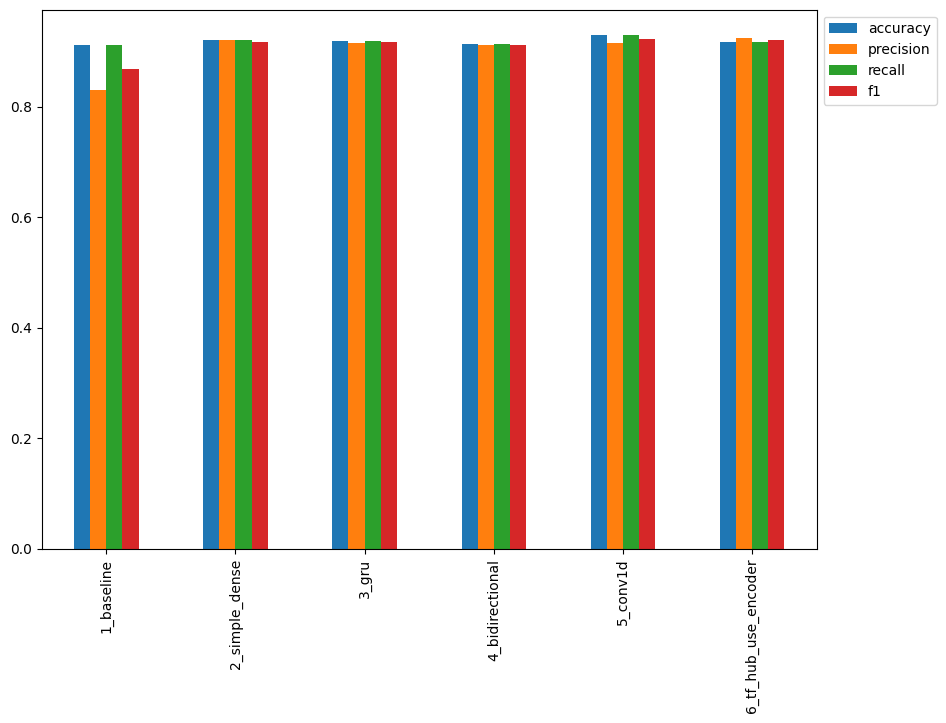

In [44]:
all_model_results.plot(kind='bar',
            figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

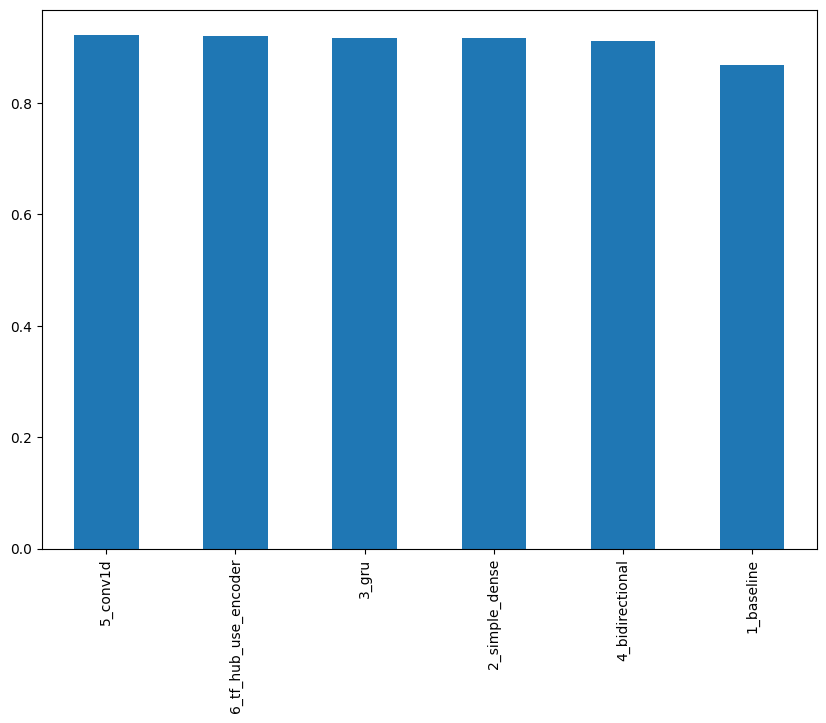

In [45]:
all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar',figsize=(10,7))

## Make prediction with the best perform model

In [53]:
import numpy as np

# Number of samples to pick
num_samples = 5

# Choose random indices
random_indices = np.random.choice(len(val_sentences), size=num_samples, replace=False)

# Pick the corresponding sentences and labels
random_sentences = val_sentences[random_indices]
random_labels = val_labels[random_indices]

# Make predictions
random_predictions = model_5.predict(random_sentences)

# Convert prediction probabilities to labels
random_predictions_labels = np.argmax(random_predictions, axis=1)

# Print the sentences, predicted labels, and true labels
for sentence, pred_label, true_label in zip(random_sentences, random_predictions_labels, random_labels):
    print("Sentence: ", sentence)
    print("Predicted label: ", "Positive" if pred_label == 2 else ("Neutral" if pred_label == 1 else "Negative"))
    print("True label: ", "Positive" if true_label == 2 else ("Neutral" if true_label == 1 else "Negative"))
    print("\n")


1/1 [==============================] - 0s 25ms/step
Sentence:  Would recommend. I have 2 of those, one in phone one in tablet. Probably i will get one more for GF.
Predicted label:  Positive
True label:  Positive


Sentence:  I bought this for a friend of mine to put some videos on it.  Initially, when plugged into the computer, we couldn't find the storage in the directory.  However, after finding a micro sd to usb adapter...bingo!  Worked like a charm after that.  Install the videos, plugged the card in the phone, and we were off to the races.Not sure if we needed the adapter, but we couldn't get the computer to recognize it.  We also used a Linux O/S.  Go figure.
Predicted label:  Positive
True label:  Positive


Sentence:  I bought this on black friday last year and took a chance on it. What chance u say? I read some reviews that this card just actually STOPPED working for no reason and not due to abuse or misuse. I had this card in my Acer Iconia A500 and it just STOPPED WORKING! 